In [96]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [97]:
#load data
data = pd.read_csv('all_data.csv')
print('Life Expectancy & GDP Data')
display(data.head(10))
print(data.info())
print(data.nunique())
display(data.isna().any())
print(data.describe())

Life Expectancy & GDP Data


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
Country                              6
Year                                16
Life expectancy at birth (years)    69
GDP                                 96
dtype: int64


Country                             False
Year                                False
Life expectancy at birth (years)    False
GDP                                 False
dtype: bool

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13


In [98]:
#Total of 96 entries, 4 columns, no null values. Country, Year, Life Expectancy at Birth (years),  and GDP (in US Dollars).
#There are six countries included. There are 16 years included.
#The average life expectancy across all 6 countries is about 73 years old. Standard deviation 10, minimum life expectancy 44, max 81.
#Average GDP across all 6 countries is 3.9 * 10^12 US Dollars. Standard deviation 5.2*10^12, minimum 4.4*10^9, max 1.8*10^13.
data.rename(columns = {'Life expectancy at birth (years)':'life_expectancy'}, inplace=True)
print('Countries')
print(data['Country'].unique())
print('')
print('Years')
print(data['Year'].unique())

Countries
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']

Years
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [99]:
chile = data.iloc[0:16]
print('Chile')
display(chile.head(5))

print('')
china = data.iloc[16:32]
print('China')
display(china.head(5))

print('')
germany = data.iloc[32:48]
print('Germany')
display(germany.head(5))

print('')
mexico = data.iloc[48:64]
print('Mexico')
display(mexico.head(5))

print('')
states = data.iloc[64:80]
print('United States')
display(states.head(5))

print('')
zimbabwe = data.iloc[80:96]
print('Zimbabwe')
display(zimbabwe.head(5))

Chile


,Country,Year,life_expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10



China


,Country,Year,life_expectancy,GDP
16,China,2000,71.7,1.211350e+12
17,China,2001,72.2,1.339400e+12
18,China,2002,72.7,1.470550e+12
19,China,2003,73.1,1.660290e+12
20,China,2004,73.5,1.955350e+12



Germany


,Country,Year,life_expectancy,GDP
32,Germany,2000,78.0,1.949950e+12
33,Germany,2001,78.3,1.950650e+12
34,Germany,2002,78.4,2.079140e+12
35,Germany,2003,78.5,2.505730e+12
36,Germany,2004,79.1,2.819250e+12



Mexico


,Country,Year,life_expectancy,GDP
48,Mexico,2000,74.8,6.836480e+11
49,Mexico,2001,75.0,7.247040e+11
50,Mexico,2002,75.0,7.415600e+11
51,Mexico,2003,75.0,7.132840e+11
52,Mexico,2004,75.4,7.702680e+11



United States


,Country,Year,life_expectancy,GDP
64,United States of America,2000,76.8,1.030000e+13
65,United States of America,2001,76.9,1.060000e+13
66,United States of America,2002,77.0,1.100000e+13
67,United States of America,2003,77.2,1.150000e+13
68,United States of America,2004,77.5,1.230000e+13



Zimbabwe


,Country,Year,life_expectancy,GDP
80,Zimbabwe,2000,46.0,6.689958e+09
81,Zimbabwe,2001,45.3,6.777385e+09
82,Zimbabwe,2002,44.8,6.342116e+09
83,Zimbabwe,2003,44.5,5.727592e+09
84,Zimbabwe,2004,44.3,5.805598e+09


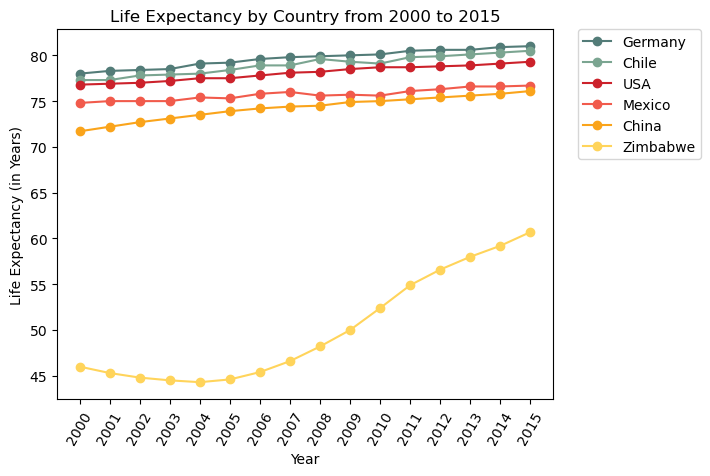

In [100]:
#all countries and life expectancies on the same graph
years = data['Year'].unique()
ax=plt.subplot()
plt.plot(germany.Year, germany.life_expectancy, label='Germany', color = '#537C78', marker = 'o')
plt.plot(chile.Year, chile.life_expectancy, label='Chile', color='#7BA591', marker = 'o')
plt.plot(states.Year, states.life_expectancy, label='USA', color = '#CC222B', marker = 'o')
plt.plot(mexico.Year, mexico.life_expectancy, label='Mexico', color = '#F15B4C', marker = 'o')
plt.plot(china.Year, china.life_expectancy, label='China', color = '#FAA41B', marker = 'o')
plt.plot(zimbabwe.Year, zimbabwe.life_expectancy, label='Zimbabwe', color = '#FFD45B', marker = 'o')
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=60)
plt.xlabel('Year')
plt.ylabel('Life Expectancy (in Years)')
plt.title('Life Expectancy by Country from 2000 to 2015')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

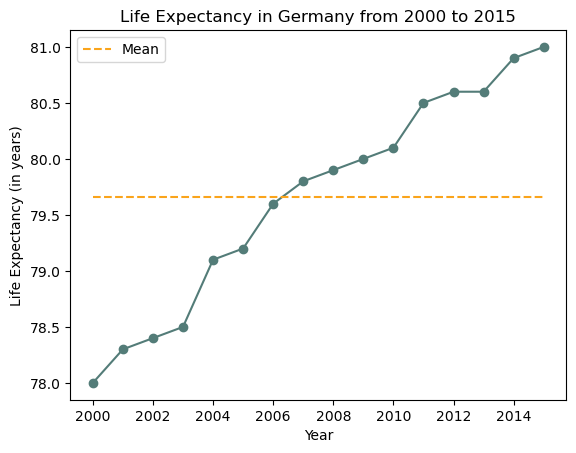

79.65625


<Figure size 640x480 with 0 Axes>

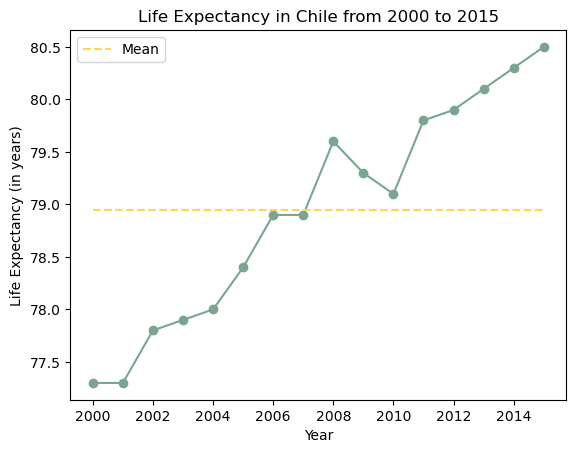

<Figure size 640x480 with 0 Axes>

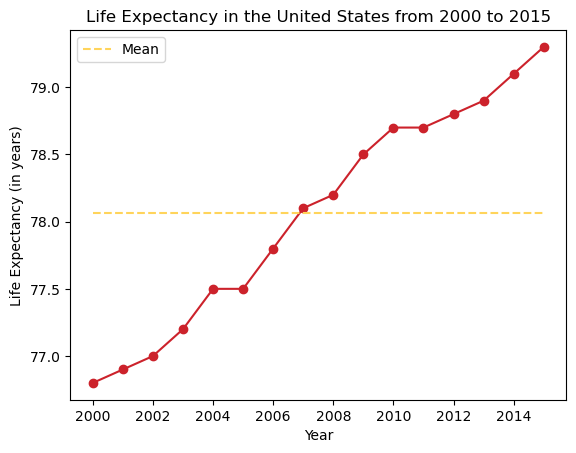

<Figure size 640x480 with 0 Axes>

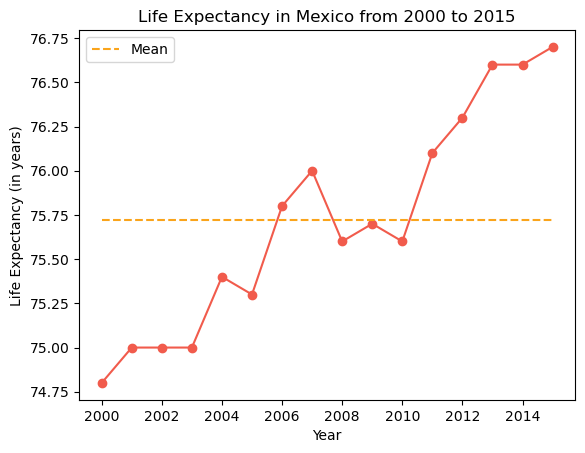

<Figure size 640x480 with 0 Axes>

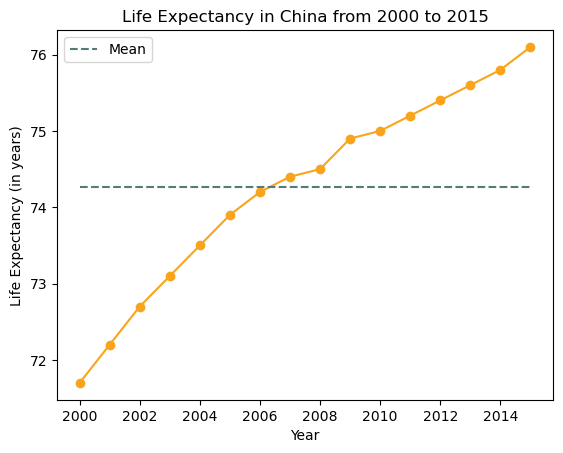

<Figure size 640x480 with 0 Axes>

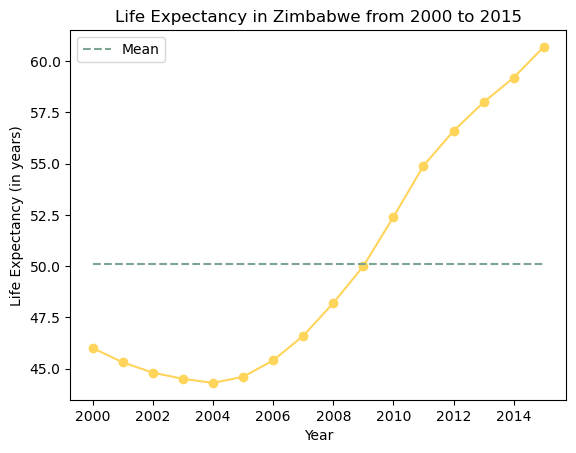

<Figure size 640x480 with 0 Axes>

In [122]:
#Germany
fig,ax = plt.subplots()
plt.plot(germany['Year'], germany['life_expectancy'], color = '#537C78', marker='o')
#plt.scatter(germany['Year'], germany['life_expectancy'], color = '#7BA591', marker = 'o')
#data_line = ax.plot(germany['Year'], germany['life_expectancy'], label='Data', marker='o')
germany_life_mean= [np.mean(germany['life_expectancy'])]*len(germany['Year'])
mean_line = ax.plot(germany['Year'], germany_life_mean, label='Mean', linestyle = '--', color = '#FAA41B')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (in years)')
plt.title('Life Expectancy in Germany from 2000 to 2015')
legend = ax.legend(loc='upper left')
plt.show()
plt.clf()

#Chile
fig,ax = plt.subplots()
plt.plot(chile['Year'], chile['life_expectancy'], color = '#7BA591', marker='o')
chile_life_mean= [np.mean(chile['life_expectancy'])]*len(chile['Year'])
mean_line = ax.plot(chile['Year'], chile_life_mean, label='Mean', linestyle = '--', color = '#FFD45B')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (in years)')
plt.title('Life Expectancy in Chile from 2000 to 2015')
legend = ax.legend(loc='upper left')
plt.show()
plt.clf()

#USA
fig,ax = plt.subplots()
plt.plot(states['Year'], states['life_expectancy'], color = '#CC222B', marker='o')
states_life_mean= [np.mean(states['life_expectancy'])]*len(states['Year'])
mean_line = ax.plot(states['Year'], states_life_mean, label='Mean', linestyle = '--', color = '#FFD45B')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (in years)')
plt.title('Life Expectancy in the United States from 2000 to 2015')
legend = ax.legend(loc='upper left')
plt.show()
plt.clf()

#Mexico
fig,ax = plt.subplots()
plt.plot(mexico['Year'], mexico['life_expectancy'], color = '#F15B4C', marker='o')
mexico_life_mean= [np.mean(mexico['life_expectancy'])]*len(mexico['Year'])
mean_line = ax.plot(mexico['Year'], mexico_life_mean, label='Mean', linestyle = '--', color = '#FAA41B')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (in years)')
plt.title('Life Expectancy in Mexico from 2000 to 2015')
legend = ax.legend(loc='upper left')
plt.show()
plt.clf()

#China
fig,ax = plt.subplots()
plt.plot(china['Year'], china['life_expectancy'], color = '#FAA41B', marker='o')
china_life_mean= [np.mean(china['life_expectancy'])]*len(china['Year'])
mean_line = ax.plot(china['Year'], china_life_mean, label='Mean', linestyle = '--', color = '#537C78')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (in years)')
plt.title('Life Expectancy in China from 2000 to 2015')
legend = ax.legend(loc='upper left')
plt.show()
plt.clf()

#Zimbabwe
fig,ax = plt.subplots()
plt.plot(zimbabwe['Year'], zimbabwe['life_expectancy'], color = '#FFD45B', marker='o')
zimbabwe_life_mean= [np.mean(zimbabwe['life_expectancy'])]*len(zimbabwe['Year'])
mean_line = ax.plot(zimbabwe['Year'], zimbabwe_life_mean, label='Mean', linestyle = '--', color = '#7BA591')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (in years)')
plt.title('Life Expectancy in Zimbabwe from 2000 to 2015')
legend = ax.legend(loc='upper left')
plt.show()
plt.clf()

In [123]:
print("Germany's Average Life Expectancy:")
print(np.mean(germany['life_expectancy']))
print("Chile's Average Life Expectancy:")
print(np.mean(chile['life_expectancy']))
print("United States' Average Life Expectancy:")
print(np.mean(states['life_expectancy']))
print("Mexico's Average Life Expectancy:")
print(np.mean(mexico['life_expectancy']))
print("China's Average Life Expectancy:")
print(np.mean(china['life_expectancy']))
print("Zimbabwe Average Life Expectancy:")
print(np.mean(zimbabwe['life_expectancy']))
print("")
print("Germany's Average GDP:")
print(np.mean(germany['GDP']))
print("Chile's Average GDP:")
print(np.mean(chile['GDP']))
print("United States' Average GDP:")
print(np.mean(states['GDP']))
print("Mexico's Average GDP:")
print(np.mean(mexico['GDP']))
print("China's Average GDP:")
print(np.mean(china['GDP']))
print("Zimbabwe Average GDP:")
print(np.mean(zimbabwe['GDP']))

Germany's Average Life Expectancy:
79.65625
Chile's Average Life Expectancy:
78.94374999999998
United States' Average Life Expectancy:
78.0625
Mexico's Average Life Expectancy:
75.71875
China's Average Life Expectancy:
74.26249999999999
Zimbabwe Average Life Expectancy:
50.09375000000001

Germany's Average GDP:
3094775625000.0
Chile's Average GDP:
169788845015.3125
United States' Average GDP:
14075000000000.0
Mexico's Average GDP:
976650625000.0
China's Average GDP:
4957713750000.0
Zimbabwe Average GDP:
9062579595.0625


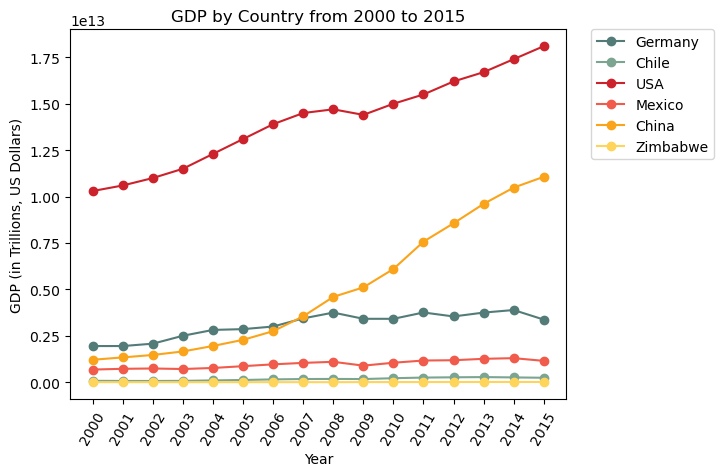

In [102]:
#all countries and GDPs on the same graph
years = data['Year'].unique()
ax=plt.subplot()
plt.plot(germany.Year, germany.GDP, label='Germany', color = '#537C78', marker = 'o')
plt.plot(chile.Year, chile.GDP, label='Chile', color='#7BA591', marker = 'o')
plt.plot(states.Year, states.GDP, label='USA', color = '#CC222B', marker = 'o')
plt.plot(mexico.Year, mexico.GDP, label='Mexico', color = '#F15B4C', marker = 'o')
plt.plot(china.Year, china.GDP, label='China', color = '#FAA41B', marker = 'o')
plt.plot(zimbabwe.Year, zimbabwe.GDP, label='Zimbabwe', color = '#FFD45B', marker = 'o')
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=60)
plt.xlabel('Year')
plt.ylabel('GDP (in Trillions, US Dollars)')
plt.title('GDP by Country from 2000 to 2015')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

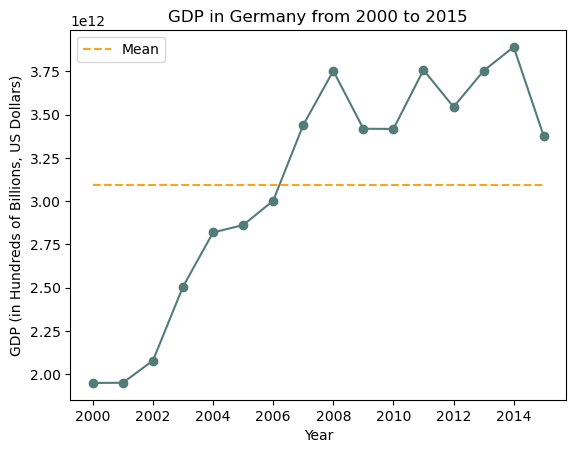

<Figure size 640x480 with 0 Axes>

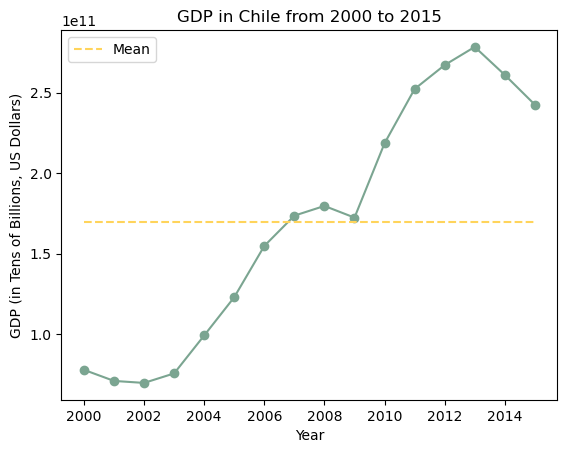

<Figure size 640x480 with 0 Axes>

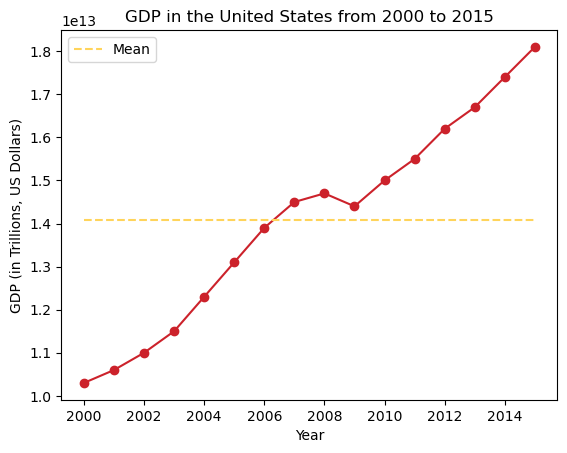

<Figure size 640x480 with 0 Axes>

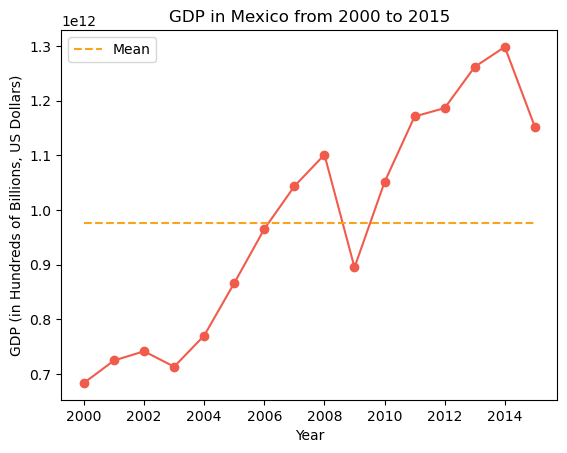

<Figure size 640x480 with 0 Axes>

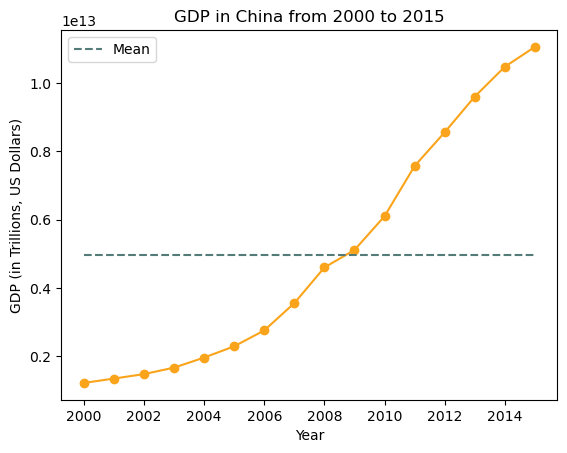

<Figure size 640x480 with 0 Axes>

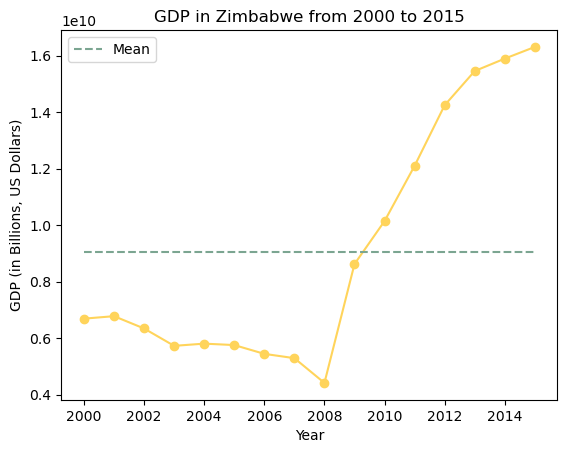

<Figure size 640x480 with 0 Axes>

In [103]:
#Germany
fig,ax = plt.subplots()
plt.plot(germany['Year'], germany['GDP'], color = '#537C78', marker='o')
germany_gdp_mean= [np.mean(germany['GDP'])]*len(germany['Year'])
mean_line = ax.plot(germany['Year'], germany_gdp_mean, label='Mean', linestyle = '--', color = '#FAA41B')
plt.xlabel('Year')
plt.ylabel('GDP (in Hundreds of Billions, US Dollars)')
plt.title('GDP in Germany from 2000 to 2015')
legend = ax.legend(loc='upper left')
plt.show()
plt.clf()

#Chile
fig,ax = plt.subplots()
plt.plot(chile['Year'], chile['GDP'], color = '#7BA591', marker='o')
chile_gdp_mean= [np.mean(chile['GDP'])]*len(chile['Year'])
mean_line = ax.plot(chile['Year'], chile_gdp_mean, label='Mean', linestyle = '--', color = '#FFD45B')
plt.xlabel('Year')
plt.ylabel('GDP (in Tens of Billions, US Dollars)')
plt.title('GDP in Chile from 2000 to 2015')
legend = ax.legend(loc='upper left')
plt.show()
plt.clf()

#USA
fig,ax = plt.subplots()
plt.plot(states['Year'], states['GDP'], color = '#CC222B', marker='o')
states_gdp_mean= [np.mean(states['GDP'])]*len(states['Year'])
mean_line = ax.plot(states['Year'], states_gdp_mean, label='Mean', linestyle = '--', color = '#FFD45B')
plt.xlabel('Year')
plt.ylabel('GDP (in Trillions, US Dollars)')
plt.title('GDP in the United States from 2000 to 2015')
legend = ax.legend(loc='upper left')
plt.show()
plt.clf()

#Mexico
fig,ax = plt.subplots()
plt.plot(mexico['Year'], mexico['GDP'], color = '#F15B4C', marker='o')
mexico_gdp_mean= [np.mean(mexico['GDP'])]*len(mexico['Year'])
mean_line = ax.plot(mexico['Year'], mexico_gdp_mean, label='Mean', linestyle = '--', color = '#FAA41B')
plt.xlabel('Year')
plt.ylabel('GDP (in Hundreds of Billions, US Dollars)')
plt.title('GDP in Mexico from 2000 to 2015')
legend = ax.legend(loc='upper left')
plt.show()
plt.clf()

#China
fig,ax = plt.subplots()
plt.plot(china['Year'], china['GDP'], color = '#FAA41B', marker='o')
china_gdp_mean= [np.mean(china['GDP'])]*len(china['Year'])
mean_line = ax.plot(china['Year'], china_gdp_mean, label='Mean', linestyle = '--', color = '#537C78')
plt.xlabel('Year')
plt.ylabel('GDP (in Trillions, US Dollars)')
plt.title('GDP in China from 2000 to 2015')
legend = ax.legend(loc='upper left')
plt.show()
plt.clf()

#Zimbabwe
fig,ax = plt.subplots()
plt.plot(zimbabwe['Year'], zimbabwe['GDP'], color = '#FFD45B', marker='o')
zimbabwe_gdp_mean= [np.mean(zimbabwe['GDP'])]*len(zimbabwe['Year'])
mean_line = ax.plot(zimbabwe['Year'], zimbabwe_gdp_mean, label='Mean', linestyle = '--', color = '#7BA591')
plt.xlabel('Year')
plt.ylabel('GDP (in Billions, US Dollars)')
plt.title('GDP in Zimbabwe from 2000 to 2015')
legend = ax.legend(loc='upper left')
plt.show()
plt.clf()

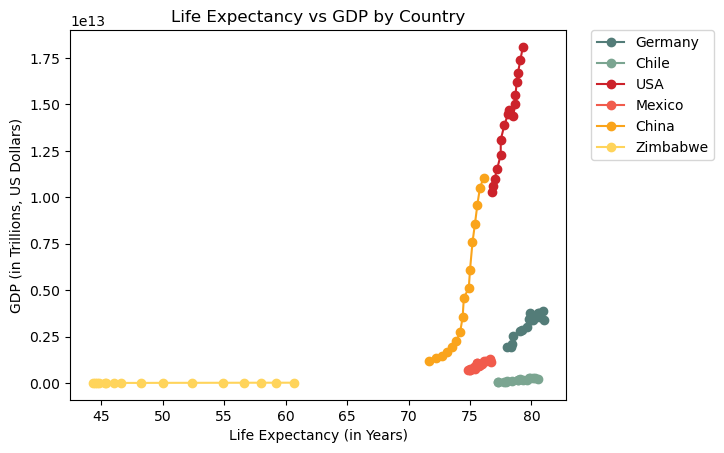

In [104]:
#all countries and GDPs on the same graph
years = data['Year'].unique()
ax=plt.subplot()
plt.plot(germany.life_expectancy, germany.GDP, label='Germany', color = '#537C78', marker = 'o')
plt.plot(chile.life_expectancy, chile.GDP, label='Chile', color='#7BA591', marker = 'o')
plt.plot(states.life_expectancy, states.GDP, label='USA', color = '#CC222B', marker = 'o')
plt.plot(mexico.life_expectancy, mexico.GDP, label='Mexico', color = '#F15B4C', marker = 'o')
plt.plot(china.life_expectancy, china.GDP, label='China', color = '#FAA41B', marker = 'o')
plt.plot(zimbabwe.life_expectancy, zimbabwe.GDP, label='Zimbabwe', color = '#FFD45B', marker = 'o')
plt.xlabel('Life Expectancy (in Years)')
plt.ylabel('GDP (in Trillions, US Dollars)')
plt.title('Life Expectancy vs GDP by Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

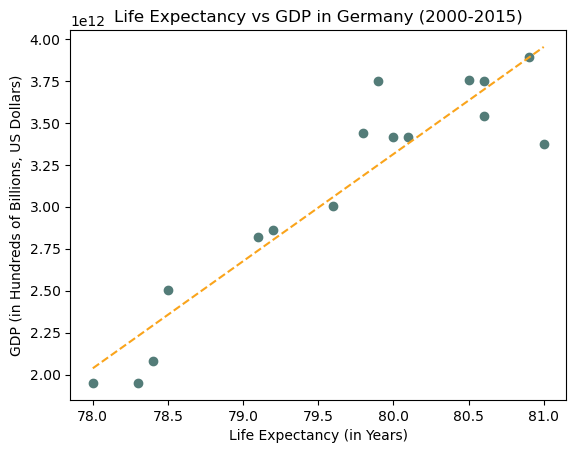

<Figure size 640x480 with 0 Axes>

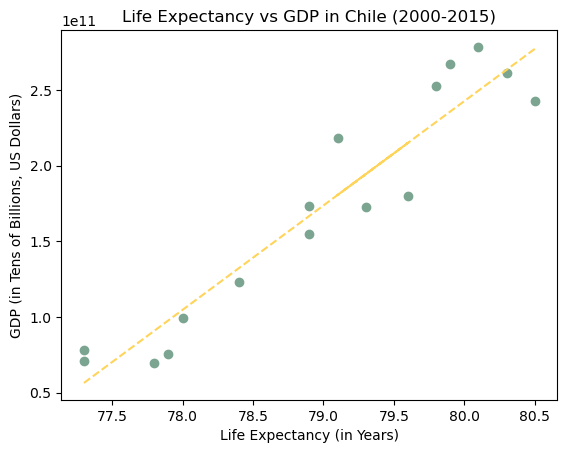

<Figure size 640x480 with 0 Axes>

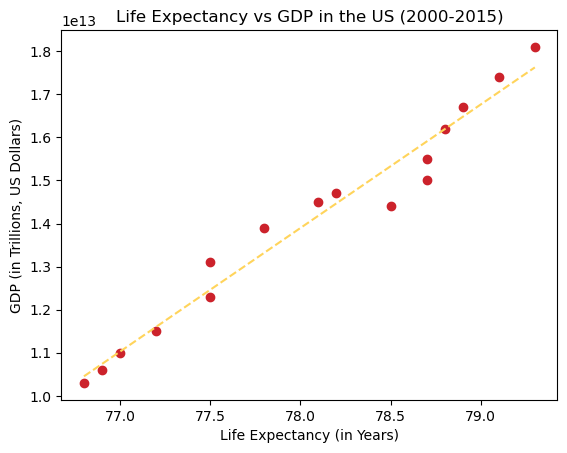

<Figure size 640x480 with 0 Axes>

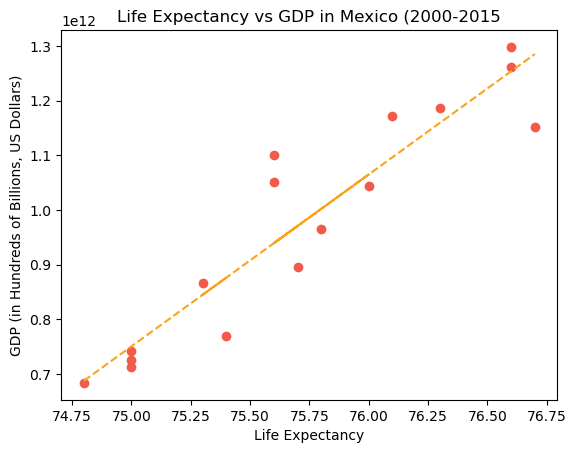

<Figure size 640x480 with 0 Axes>

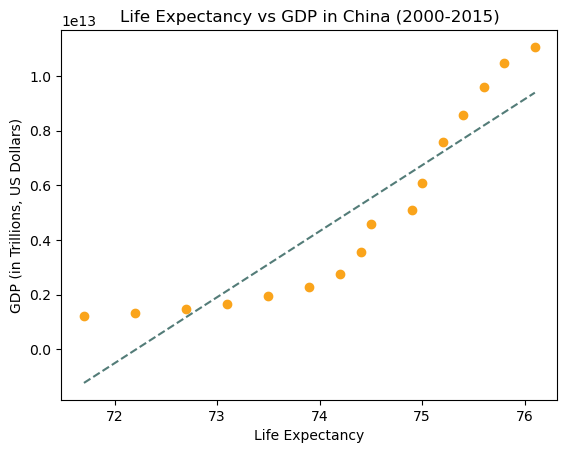

<Figure size 640x480 with 0 Axes>

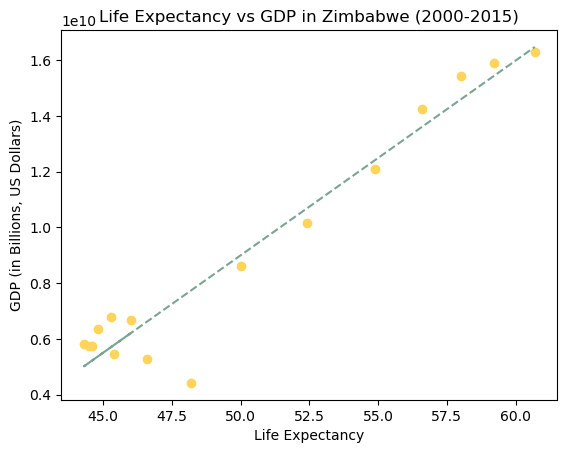

<Figure size 640x480 with 0 Axes>

In [105]:
#Germany
fig,ax = plt.subplots()
plt.scatter(germany['life_expectancy'], germany['GDP'], color = '#537C78', marker='o')
a, b = np.polyfit(germany['life_expectancy'], germany['GDP'], 1)
x=germany['life_expectancy']
plt.plot(x, a*x+b, linestyle = '--', color = '#FAA41B')
plt.xlabel('Life Expectancy (in Years)')
plt.ylabel('GDP (in Hundreds of Billions, US Dollars)')
plt.title('Life Expectancy vs GDP in Germany (2000-2015)')
plt.show()
plt.clf()

#Chile
fig,ax = plt.subplots()
plt.scatter(chile['life_expectancy'], chile['GDP'], color = '#7BA591', marker='o')
a, b = np.polyfit(chile['life_expectancy'], chile['GDP'], 1)
x=chile['life_expectancy']
plt.plot(x, a*x+b, linestyle = '--', color = '#FFD45B')
plt.xlabel('Life Expectancy (in Years)')
plt.ylabel('GDP (in Tens of Billions, US Dollars)')
plt.title('Life Expectancy vs GDP in Chile (2000-2015)')
plt.show()
plt.clf()

#USA
fig,ax = plt.subplots()
plt.scatter(states['life_expectancy'], states['GDP'], color = '#CC222B', marker='o')
a, b = np.polyfit(states['life_expectancy'], states['GDP'], 1)
x=states['life_expectancy']
plt.plot(x, a*x+b, linestyle = '--', color = '#FFD45B')
plt.xlabel('Life Expectancy (in Years)')
plt.ylabel('GDP (in Trillions, US Dollars)')
plt.title('Life Expectancy vs GDP in the US (2000-2015)')
plt.show()
plt.clf()

#Mexico
fig,ax = plt.subplots()
plt.scatter(mexico['life_expectancy'], mexico['GDP'], color = '#F15B4C', marker='o')
a, b = np.polyfit(mexico['life_expectancy'], mexico['GDP'], 1)
x=mexico['life_expectancy']
plt.plot(x, a*x+b, linestyle = '--', color = '#FAA41B')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP (in Hundreds of Billions, US Dollars)')
plt.title('Life Expectancy vs GDP in Mexico (2000-2015')
plt.show()
plt.clf()

#China
fig,ax = plt.subplots()
plt.scatter(china['life_expectancy'], china['GDP'], color = '#FAA41B', marker='o')
a, b = np.polyfit(china['life_expectancy'], china['GDP'], 1)
x=china['life_expectancy']
plt.plot(x, a*x+b, linestyle = '--', color = '#537C78')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP (in Trillions, US Dollars)')
plt.title('Life Expectancy vs GDP in China (2000-2015)')
plt.show()
plt.clf()

#Zimbabwe
fig,ax = plt.subplots()
plt.scatter(zimbabwe['life_expectancy'], zimbabwe['GDP'], color = '#FFD45B', marker='o')
a, b = np.polyfit(zimbabwe['life_expectancy'], zimbabwe['GDP'], 1)
x=zimbabwe['life_expectancy']
plt.plot(x, a*x+b, linestyle = '--', color = '#7BA591')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP (in Billions, US Dollars)')
plt.title('Life Expectancy vs GDP in Zimbabwe (2000-2015)')
plt.show()
plt.clf()

In [106]:
#What is the average life expectancy in these nations?
#What is the distribution of that life expectancy?

In [107]:
countries_avg=data.groupby('Country').life_expectancy.mean().reset_index()
countries_avg['mean_gdp']=data.groupby('Country').GDP.mean().reset_index()['GDP']
countries_avg.rename(columns={'life_expectancy':'mean_life_expectancy'}, inplace=True)
countries_avg=countries_avg.sort_values(by=['mean_life_expectancy'],ascending=False)
print(countries_avg)

                    Country  mean_life_expectancy      mean_gdp
2                   Germany              79.65625  3.094776e+12
0                     Chile              78.94375  1.697888e+11
4  United States of America              78.06250  1.407500e+13
3                    Mexico              75.71875  9.766506e+11
1                     China              74.26250  4.957714e+12
5                  Zimbabwe              50.09375  9.062580e+09


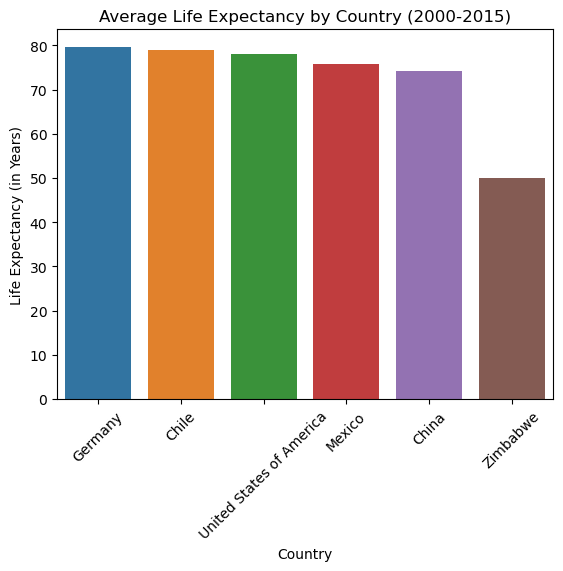

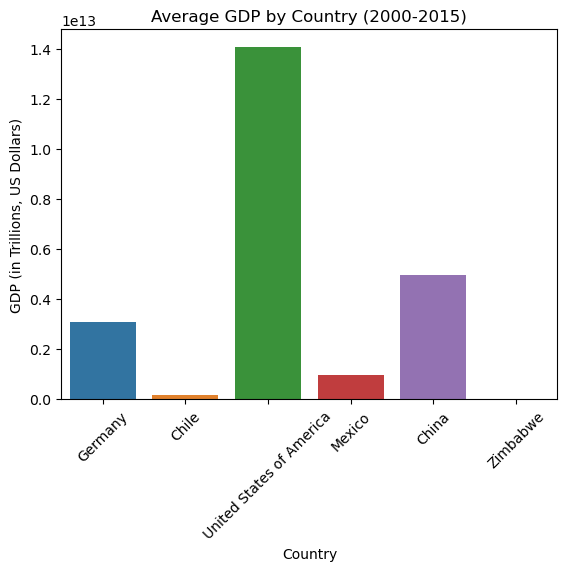

<Figure size 640x480 with 0 Axes>

In [108]:
sns.barplot(data=countries_avg, x='Country', y='mean_life_expectancy')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (in Years)')
plt.title('Average Life Expectancy by Country (2000-2015)')
plt.xticks(rotation = 45)
plt.show()
plt.clf()

sns.barplot(data=countries_avg, x='Country', y='mean_gdp')
plt.xlabel('Country')
plt.ylabel('GDP (in Trillions, US Dollars)')
plt.title('Average GDP by Country (2000-2015)')
plt.xticks(rotation = 45)
plt.show()
plt.clf()

In [119]:
for c in data['Country'].unique():
    contingency_table=np.array(data[data.Country==c][['life_expectancy','GDP']].reset_index(drop=True))
    chi2,pval,dof,expected=chi2_contingency(contingency_table)
    print('{}: {}'.format(c, pval))

Chile: 1.3237123577763536e-60
China: 2.1829770509747513e-163
Germany: 8.668939446302759e-08
Mexico: 4.929528261863451e-06
United States of America: 0.00468723379054244
Zimbabwe: 1.7950811649618197e-14
